<a href="https://colab.research.google.com/github/cathrine36/ML_algorithms/blob/master/Gradient_Boosting_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/titanic/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/titanic/test.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
len(df_train)

891

In [ ]:
dataset = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']]
print("Total ", len(dataset))
print(dataset.isnull().sum())

Total  891
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Survived      0
dtype: int64


In [ ]:
# dataset = dataset.dropna()
# print(len(dataset))
dataset.fillna(value=0.0, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
X = dataset.drop(labels=['Survived'], axis=1)
y = dataset.Survived

In [ ]:
X.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
gender_map = {'male':0, 'female':1}

In [ ]:
X['Sex'] = X.Sex.map(gender_map)

In [ ]:
X.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [ ]:
# transform data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale,y,train_size=0.8)
print("Total", len(X))
print("Train size ", len(X_train))
print("Test size ", len(X_test))

Total 891
Train size  712
Test size  179


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print("Train data", model.score(X_train,y_train))
print("Test data" , model.score(X_test,y_test))


Train data 0.8103932584269663
Test data 0.8435754189944135


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=100)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print("Train data", model.score(X_train,y_train))
print("Test data" , model.score(X_test,y_test))


Train data 0.8441011235955056
Test data 0.7988826815642458


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1000)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print("Train data", model.score(X_train,y_train))
print("Test data" , model.score(X_test,y_test))


Train data 0.8581460674157303
Test data 0.8100558659217877


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10000)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print("Train data", model.score(X_train,y_train))
print("Test data" , model.score(X_test,y_test))


Train data 0.8595505617977528
Test data 0.8156424581005587


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[91, 17],
       [16, 55]])

Text(15.0, 0.5, 'Truth')

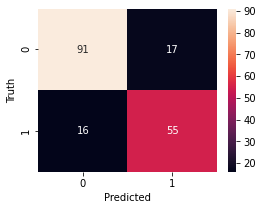

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators = [20,30,40,50,60,70,80,90,100]

for learning_rate in learning_rates:
  for n_estimator in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate, "n_estimator", n_estimator)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05 n_estimator 20
Accuracy score (training): 0.787
Accuracy score (validation): 0.782

Learning rate:  0.05 n_estimator 30
Accuracy score (training): 0.787
Accuracy score (validation): 0.782

Learning rate:  0.05 n_estimator 40
Accuracy score (training): 0.795
Accuracy score (validation): 0.788

Learning rate:  0.05 n_estimator 50
Accuracy score (training): 0.802
Accuracy score (validation): 0.816

Learning rate:  0.05 n_estimator 60
Accuracy score (training): 0.809
Accuracy score (validation): 0.838

Learning rate:  0.05 n_estimator 70
Accuracy score (training): 0.803
Accuracy score (validation): 0.849

Learning rate:  0.05 n_estimator 80
Accuracy score (training): 0.801
Accuracy score (validation): 0.860

Learning rate:  0.05 n_estimator 90
Accuracy score (training): 0.801
Accuracy score (validation): 0.855

Learning rate:  0.05 n_estimator 100
Accuracy score (training): 0.805
Accuracy score (validation): 0.866

Learning rate:  0.1 n_estimator 20
Accuracy score (tra

In [ ]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[95 13]
 [17 54]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       108
           1       0.81      0.76      0.78        71

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
# ROC curve and Area-Under-Curve (AUC)

y_scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.88
